Problem statement for Assignment-5 is:


Do histogram equalization on pout-dark and display the same

Do histogram matching (specification) on the pout-dark image, keeping pout-bright as a reference image.


Note:
Use predefined as well as user defined functions for the above problems


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

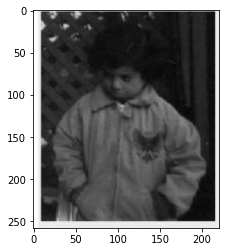

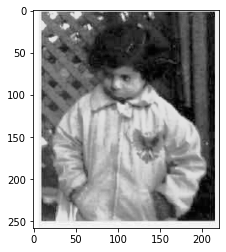

In [3]:
pout_dark=cv2.imread('pout-dark.jpg',0)
plt.imshow(pout_dark,cmap='gray')
plt.show()
equ = cv2.equalizeHist(pout_dark)
plt.imshow(equ,cmap='gray')
plt.show()

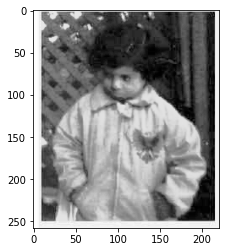

In [8]:
img=cv2.imread('pout-dark.jpg',0)
#count no of pixels in each number
width=img.shape[0]
height=img.shape[1]
values=[]

for k in range (0,256):
    count=0
    for i in range(0,width):
        for j in range(0,height):
            if img[i,j]==k:
                count=count+1
    values.append(count)

pdf=[]
for i in range(len(values)):
    pdf.append(values[i]/(width*height))

cdf=[]
sum=0
for i in range(len(pdf)):
    sum=sum+pdf[i]
    cdf.append(sum)

for i in range(len(cdf)):
    cdf[i]=cdf[i]*255

new_img=np.zeros((width,height),np.uint8)

for i in range(0,width):
    for j in range(0,height):
        new_img[i,j]=cdf[img[i,j]]
    
plt.imshow(new_img,cmap='gray')
plt.show()